# Sebastian Vettel
<img src="https://www.formula1.com/content/fom-website/en/drivers/sebastian-vettel/_jcr_content/image.img.1920.medium.jpg/1646818813887.jpg" width="300">

### Team: Aston Martin
<img src ="https://www.formula1.com/content/fom-website/en/drivers/sebastian-vettel/_jcr_content/helmet.img.png/1646824978505.png" width="200">


In [28]:
library (tidyverse)
library (tidymodels)
source("source/master_functions.r")
source("source/regression.r")
source("source/prediction.r")
set.seed(620)

In [29]:
initialize_master()

Parsed with column specification:
cols(
  circuitId = col_double(),
  circuitRef = col_character(),
  name = col_character(),
  location = col_character(),
  country = col_character(),
  lat = col_double(),
  lng = col_double(),
  alt = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  constructorStandingsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  position = col_double(),
  positionText = col_character(),
  wins = col_double()
)

Parsed with column specification:
cols(
  constructorResultsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  status = col_character()
)

Parsed with column specification:
cols(
  constructorId = col_double(),
  constructorRef = col_character(),
  name = col_character(),
  nationality = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  driverId = col_double(),
  driverRef = col_

In [30]:
# Filtering Lap Data For 2022 Drivers

lap_data <- lap_times %>%
            filter(driverId %in% driver_ids) %>%
            filter(raceId %in% race_ids)

vet_laps <- lap_data %>%
            filter(driverId == 20)

# Season Analysis

In [31]:
rmse_col <- data.frame(.metric = character(), .estimator = character(), .estimate = double(), Round = double(), stringsAsFactors=FALSE) 

racetime_col <- data.frame(race_time_milliseconds = double(), race_time_mins = double(), race_time_hrs = double()) 

rmse_col

racetime_col

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>


race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>


`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
971,57
990,57
1011,57
1045,56
1052,55


`geom_smooth()` using formula 'y ~ x'



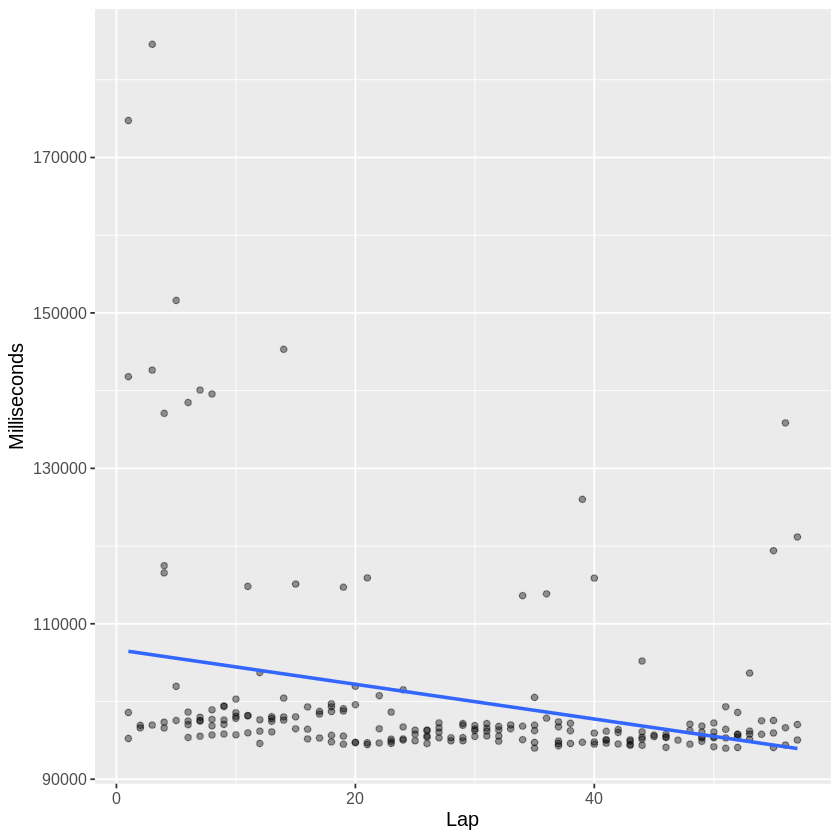

In [32]:
set.seed(2022)

#1. Bahrain 

sv_bahrain <- vet_laps %>%
                filter(raceId %in% bahrain_race_ID) 

sv_bahrain_clean <- sv_bahrain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        filter (n != 49) %>%
                        filter (n != 87)
sv_bahrain_clean
sv_bahrain_clean_ID <- sv_bahrain_clean %>%
                        pull(raceId)

### SPLITTING DATA

sv_bahrain_races <- vet_laps %>%
                    filter(raceId %in% sv_bahrain_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(sv_bahrain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 1

initiate_rmse() 

### GETS PREDICTION

get_bahrain_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1042,65
1054,65


`geom_smooth()` using formula 'y ~ x'



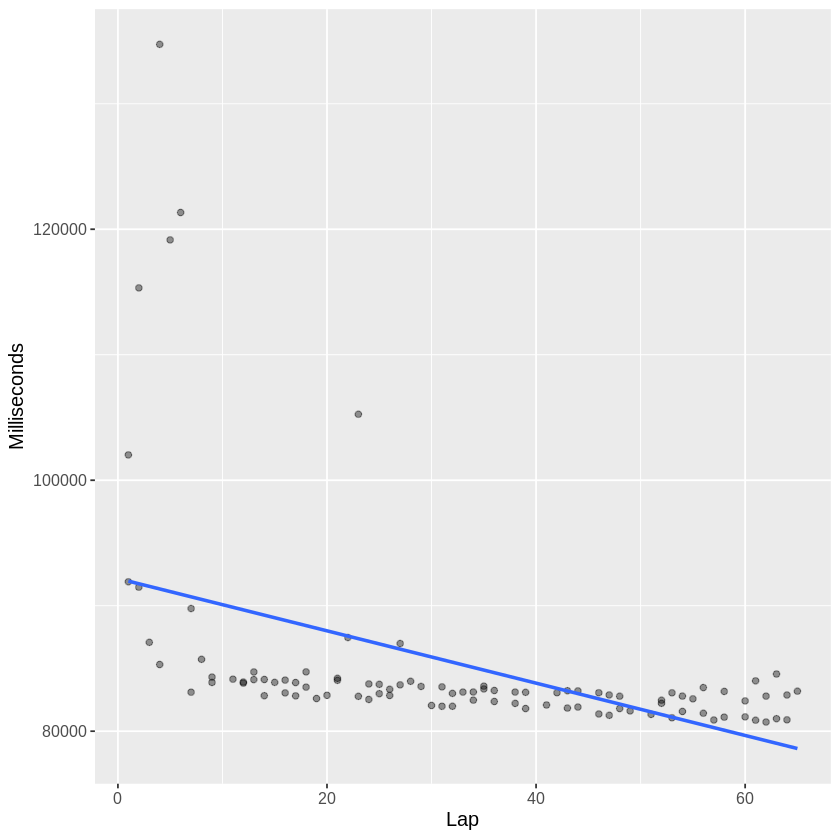

In [33]:
set.seed(2022)

#2. Portimão

sv_Portimão <- vet_laps %>%
                filter(raceId %in% Portimão_race_ID) 

sv_Portimão_clean <- sv_Portimão %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
sv_Portimão_clean
sv_Portimão_clean_ID <- sv_Portimão_clean %>%
                        pull(raceId)


### SPLITTING DATA

sv_Portimão_races <- vet_laps %>%
                    filter(raceId %in% sv_Portimão_clean_ID) 

formulaone_split <- initial_split(sv_Portimão_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 2

initiate_rmse() 

### GETS PREDICTION

get_Portimão_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
989,58
1010,58
948,57
969,57


`geom_smooth()` using formula 'y ~ x'



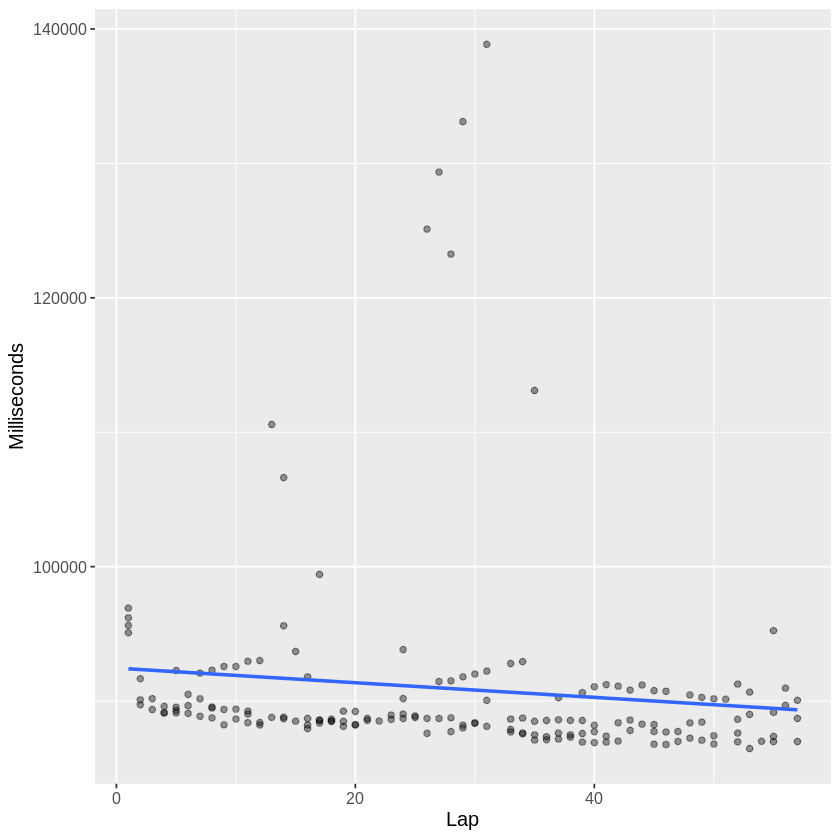

In [34]:
set.seed(2022)

#3. Austrailia

sv_aus <- vet_laps %>%
                filter(raceId %in% aus_race_ID) 

sv_aus_clean <- sv_aus %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        filter(n != 25) %>%
                        filter(n != 3)
sv_aus_clean
sv_aus_clean_ID <- sv_aus_clean %>%
                        pull(raceId)

sv_aus_races <- vet_laps %>%
                    filter(raceId %in% sv_aus_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(sv_aus_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 3

initiate_rmse() 

### GETS PREDICTION

get_australia_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1043,63
1053,61


`geom_smooth()` using formula 'y ~ x'



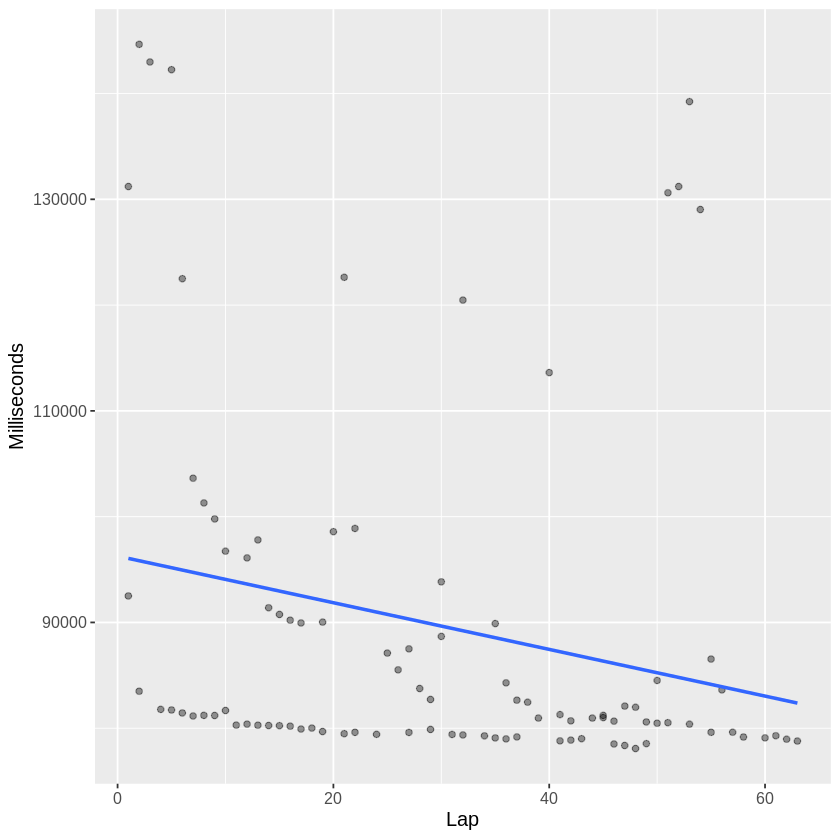

In [35]:
set.seed(2022)

#4. Imola, Italy

sv_imola <- vet_laps %>%
                filter(raceId %in% imola_race_ID) 

sv_imola_clean <- sv_imola %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
sv_imola_clean
sv_imola_clean_ID <- sv_imola_clean %>%
                        pull(raceId)

sv_imola_races <- vet_laps %>%
                    filter(raceId %in% sv_imola_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(sv_imola_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 4

initiate_rmse() 

### GETS PREDICTION

get_imola_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1044,58
1067,57


`geom_smooth()` using formula 'y ~ x'



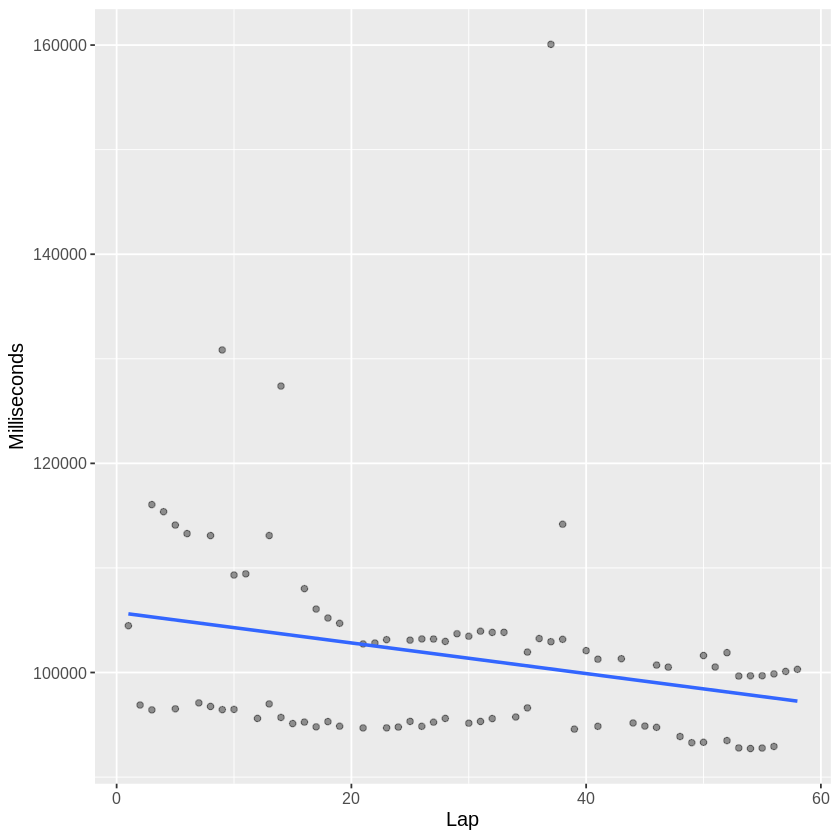

In [36]:
set.seed(2022)

#5. Turkey (Replacing Miami)

sv_turkey <- vet_laps %>%
                filter(raceId %in% turkey_race_ID) 

sv_turkey_clean <- sv_turkey %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
sv_turkey_clean
sv_turkey_clean_ID <- sv_turkey_clean %>%
                        pull(raceId)

sv_turkey_races <- vet_laps %>%
                    filter(raceId %in% sv_turkey_clean_ID)

formulaone_split <- initial_split(sv_turkey_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 5

initiate_rmse() 

### GETS PREDICTION

get_miami_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
952,66
973,66
993,66
1014,66
1036,65
1055,65


`geom_smooth()` using formula 'y ~ x'



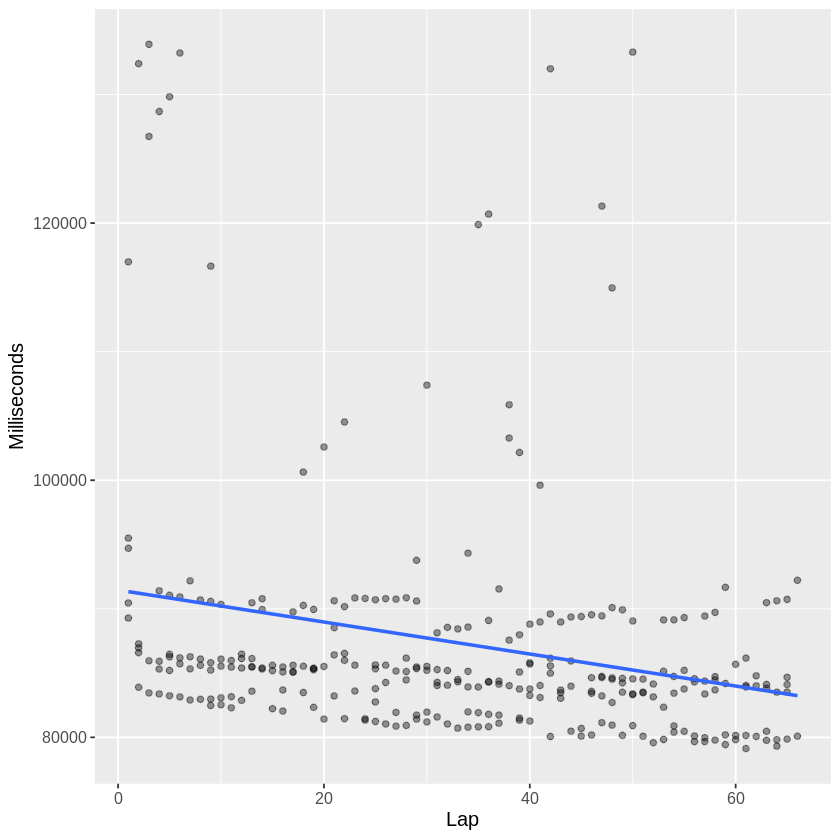

In [37]:
set.seed(2022)

#6. Spain

sv_spain <- vet_laps %>%
                filter(raceId %in% spain_race_ID) 

sv_spain_clean <- sv_spain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
sv_spain_clean
sv_spain_clean_ID <- sv_spain_clean %>%
                        pull(raceId)

sv_spain_races <- vet_laps %>%
                    filter(raceId %in% sv_spain_clean_ID)

formulaone_split <- initial_split(sv_spain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 6

initiate_rmse() 

### GETS PREDICTION

get_spain_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
953,78
974,78
994,78
1015,78
1056,78


`geom_smooth()` using formula 'y ~ x'



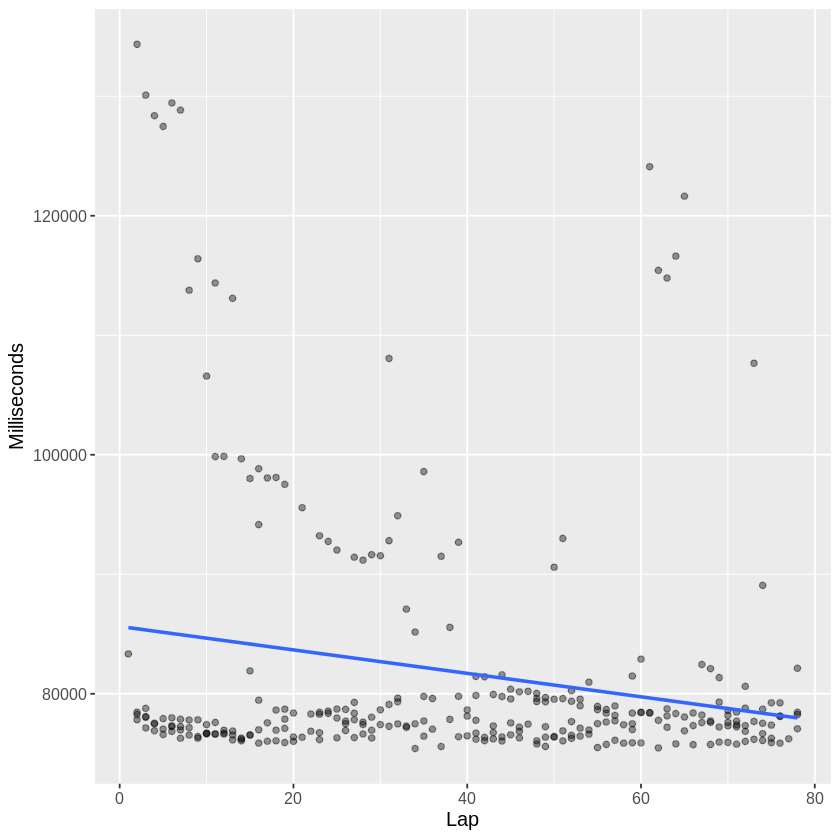

In [38]:
set.seed(2022)

#7. Monaco

sv_monaco <- vet_laps %>%
                filter(raceId %in% monaco_race_ID) 

sv_monaco_clean <- sv_monaco %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        head(n=10)
sv_monaco_clean
sv_monaco_clean_ID <- sv_monaco_clean %>%
                        pull(raceId)

sv_monaco_races <- vet_laps %>%
                    filter(raceId %in% sv_monaco_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(sv_monaco_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 7

initiate_rmse() 

### GETS PREDICTION

get_monaco_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
955,51
976,51
992,51
1013,51
1057,51


`geom_smooth()` using formula 'y ~ x'



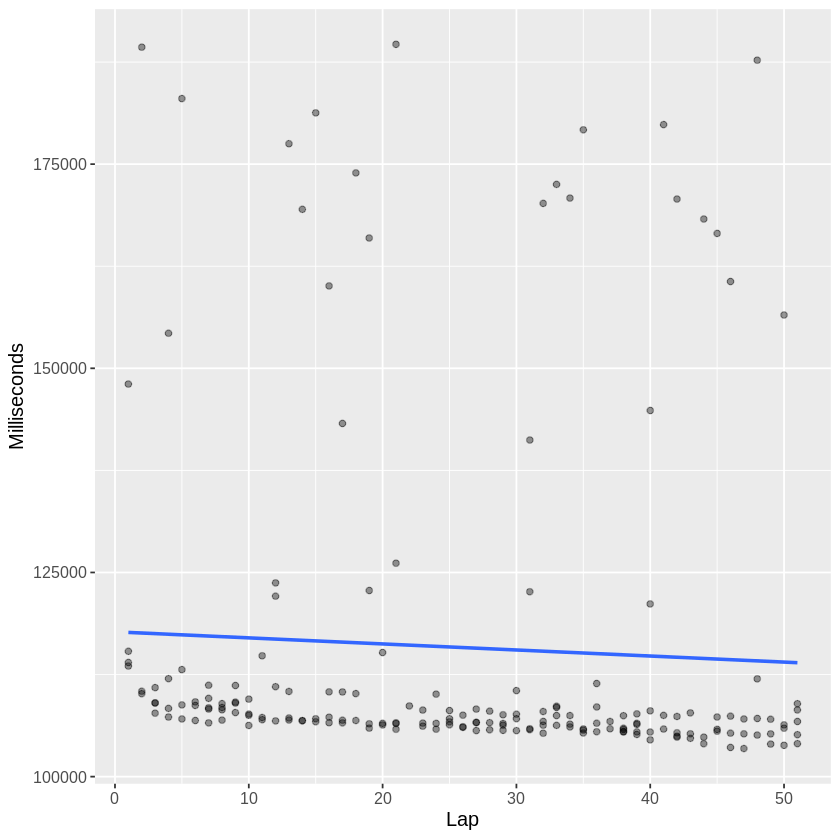

In [39]:
set.seed(2022)

#8. Azerbaijan

sv_azerbaijan <- vet_laps %>%
                filter(raceId %in% azerbaijan_race_ID) 

sv_azerbaijan_clean <- sv_azerbaijan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
sv_azerbaijan_clean
sv_azerbaijan_clean_ID <- sv_azerbaijan_clean %>%
                        pull(raceId)

sv_azerbaijan_races <- vet_laps %>%
                    filter(raceId %in% sv_azerbaijan_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(sv_azerbaijan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 8

initiate_rmse() 

### GETS PREDICTION

get_azerbaijan_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
954,70
975,70
1016,70
995,68


`geom_smooth()` using formula 'y ~ x'



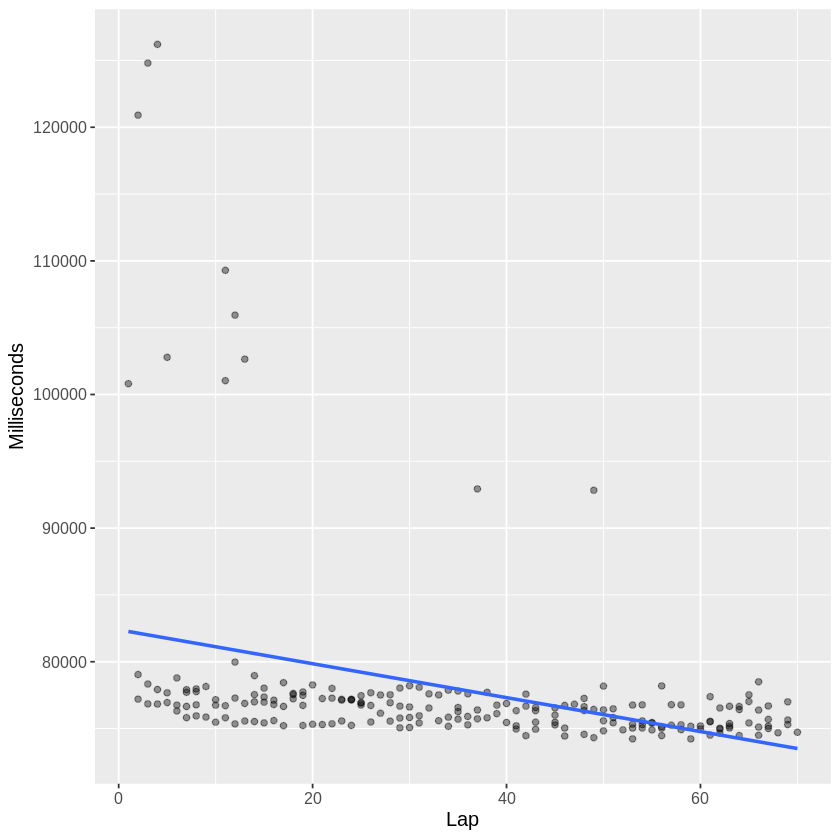

In [40]:
set.seed(2022)

#9. Canada

sv_canada <- vet_laps %>%
                filter(raceId %in% canada_race_ID) 

sv_canada_clean <- sv_canada %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        head(10)
sv_canada_clean
sv_canada_clean_ID <- sv_canada_clean %>%
                        pull(raceId)

sv_canada_races <- vet_laps %>%
                    filter(raceId %in% sv_canada_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(sv_canada_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 9

initiate_rmse() 

### GETS PREDICTION

get_canada_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
957,52
998,52
1034,52
1035,52
978,51
1019,51
1061,40


`geom_smooth()` using formula 'y ~ x'



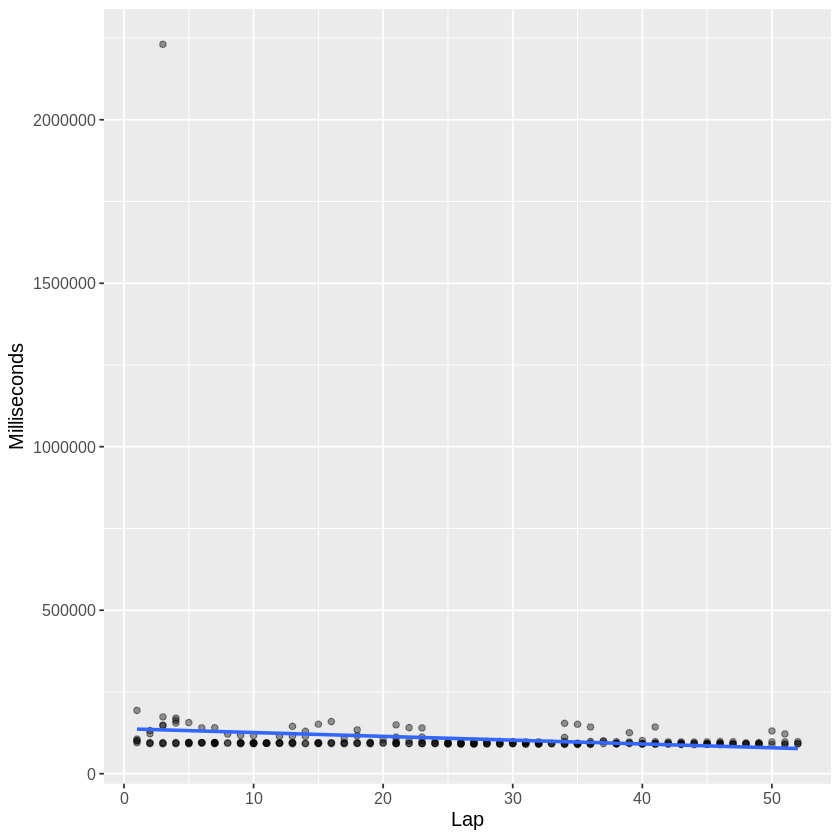

In [41]:
set.seed(2022)

#10. Great Britain

sv_uk <- vet_laps %>%
                filter(raceId %in% uk_race_ID) 

sv_uk_clean <- sv_uk %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        head(12) %>%
                        filter(n != 60)
sv_uk_clean
sv_uk_clean_ID <- sv_uk_clean %>%
                        pull(raceId)

sv_uk_races <- vet_laps %>%
                    filter(raceId %in% sv_uk_clean_ID) 

formulaone_split <- initial_split(sv_uk_races, prop = 0.75, strata = milliseconds)  

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 10

initiate_rmse() 

### GETS PREDICTION

get_uk_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
977,71
997,71
1018,71
1031,71
1058,70
1060,69
956,26


`geom_smooth()` using formula 'y ~ x'



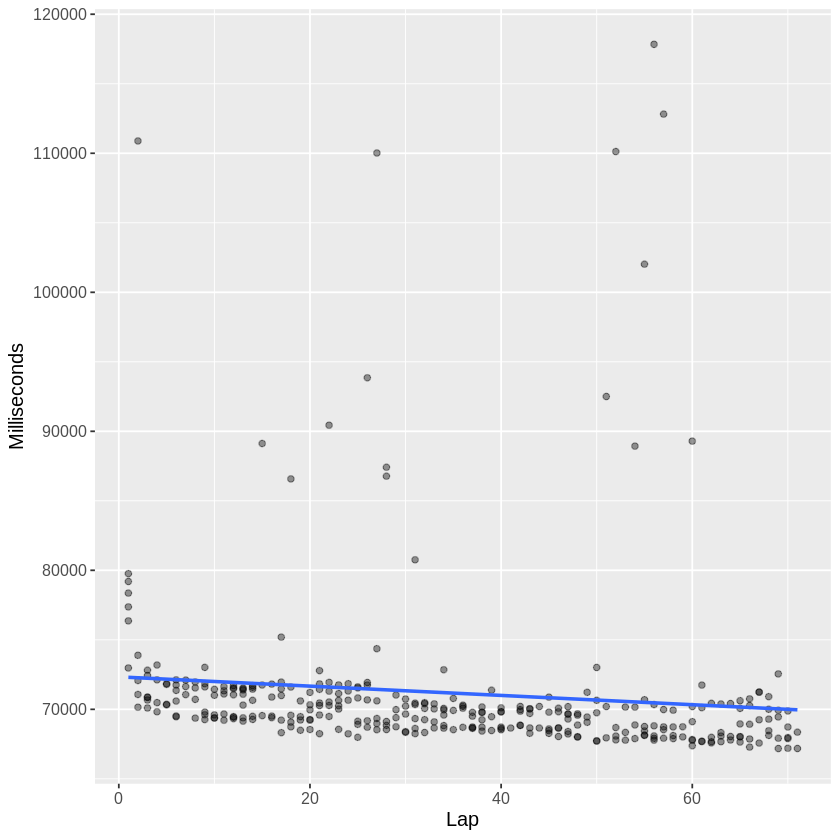

In [42]:
set.seed(2022)

#11. Austria

sv_austria <- vet_laps %>%
                filter(raceId %in% austria_race_ID) 

sv_austria_clean <- sv_austria %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        head(7)
sv_austria_clean
sv_austria_clean_ID <- sv_austria_clean %>%
                        pull(raceId) 

sv_austria_races <- vet_laps %>%
                    filter(raceId %in% sv_austria_clean_ID)

formulaone_split <- initial_split(sv_austria_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 11

initiate_rmse() 

### GETS PREDICTION

get_austria_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
996,53
1017,53
1059,53


`geom_smooth()` using formula 'y ~ x'



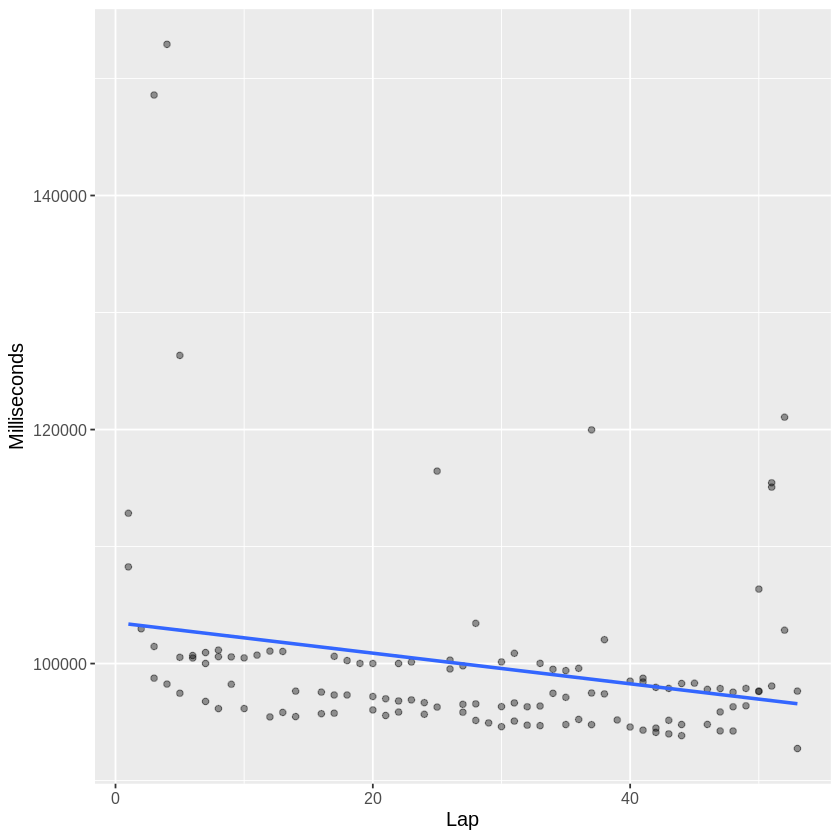

In [43]:
set.seed(2022)

#12. France

sv_france <- vet_laps %>%
                filter(raceId %in% france_race_ID) 

sv_france_clean <- sv_france %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
sv_france_clean
sv_france_clean_ID <- sv_france_clean %>%
                        pull(raceId)

sv_france_races <- vet_laps %>%
                    filter(raceId %in% sv_france_clean_ID) 

formulaone_split <- initial_split(sv_france_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 12

initiate_rmse() 

### GETS PREDICTION

get_france_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
958,70
979,70
1000,70
1021,70
1062,70
1033,69


`geom_smooth()` using formula 'y ~ x'



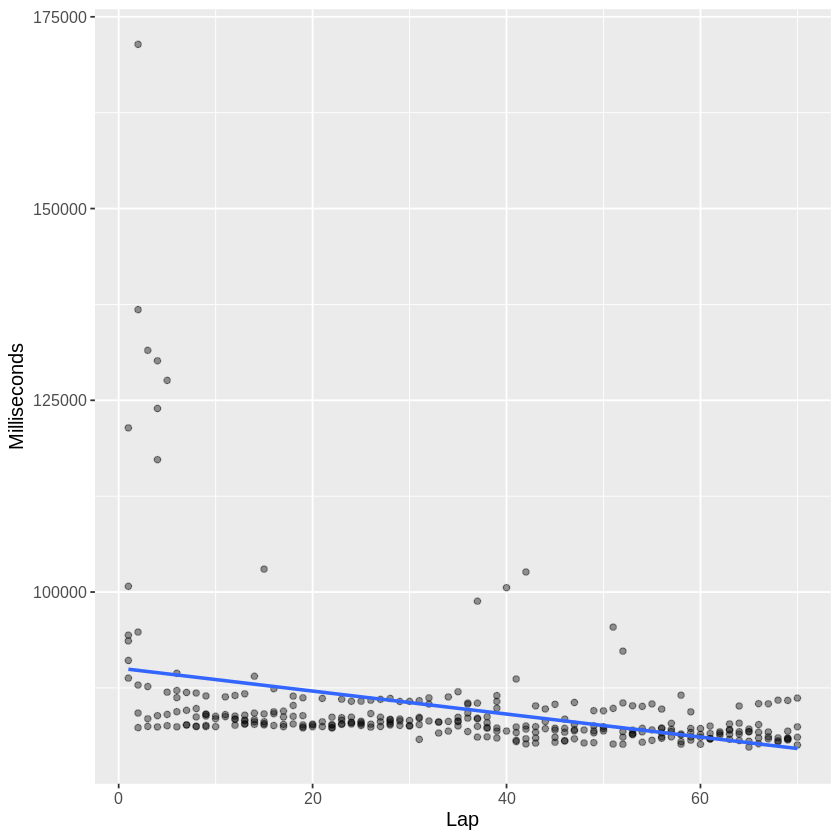

In [44]:
set.seed(2022)

#13. Hungary

sv_hungary <- vet_laps %>%
                filter(raceId %in% hungary_race_ID) 

sv_hungary_clean <- sv_hungary %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        head(13)
sv_hungary_clean
sv_hungary_clean_ID <- sv_hungary_clean %>%
                        pull(raceId)

sv_hungary_races <- vet_laps %>%
                    filter(raceId %in% sv_hungary_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(sv_hungary_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 13

initiate_rmse() 

### GETS PREDICTION

get_hungary_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
960,44
980,44
1001,44
1022,44
1037,44
1063,1


`geom_smooth()` using formula 'y ~ x'



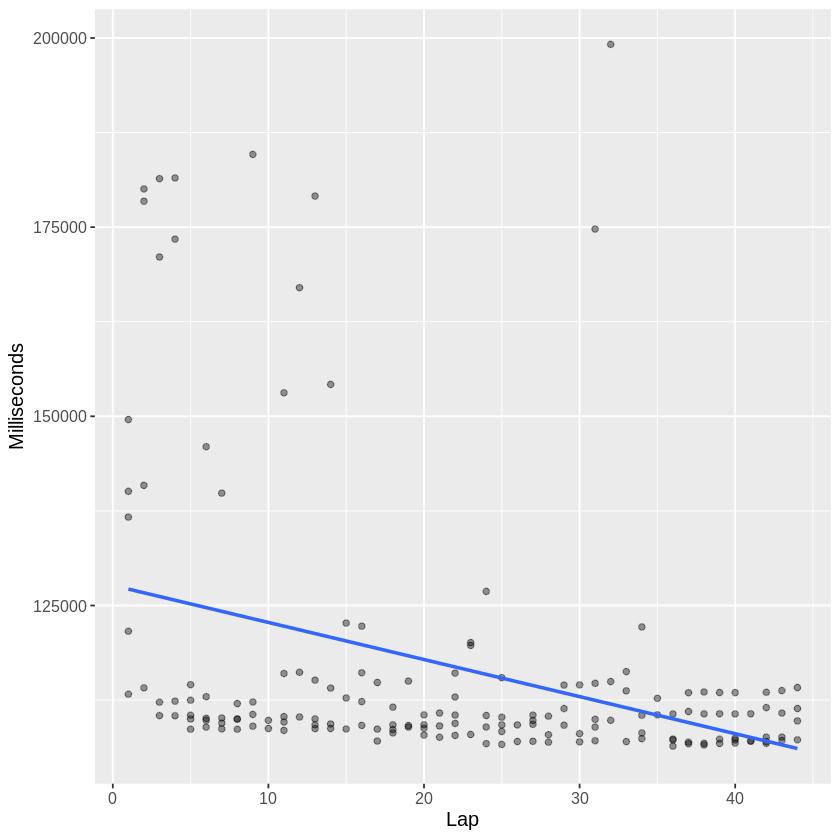

In [45]:
set.seed(2022)

#14. Belgium

sv_belgium <- vet_laps %>%
                filter(raceId %in% belgium_race_ID) 

sv_belgium_clean <- sv_belgium %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        head(13)
sv_belgium_clean
sv_belgium_clean_ID <- sv_belgium_clean %>%
                        pull(raceId)

sv_belgium_races <- vet_laps %>%
                    filter(raceId %in% sv_belgium_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(sv_belgium_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 14

initiate_rmse() 

### GETS PREDICTION

get_belgium_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1064,70


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



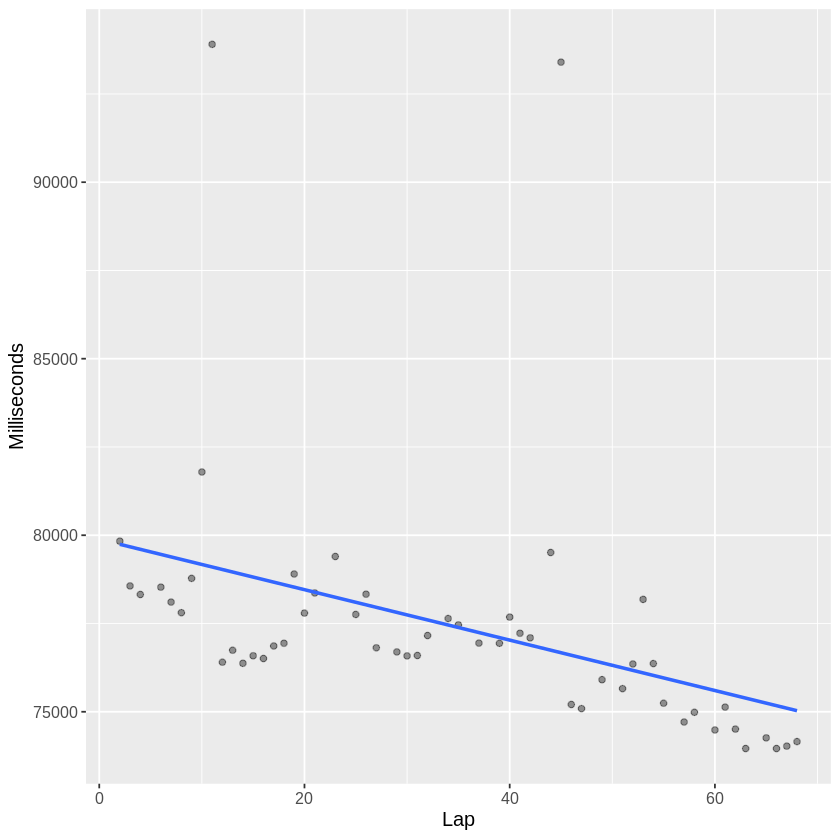

In [46]:
set.seed(2022)

#15. Netherlands

sv_netherlands <- vet_laps %>%
                filter(raceId %in% netherlands_race_ID) 

sv_netherlands_clean <- sv_netherlands %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
sv_netherlands_clean
sv_netherlands_clean_ID <- sv_netherlands_clean %>%
                        pull(raceId)

sv_netherlands_races <- vet_laps %>%
                    filter(raceId %in% sv_netherlands_clean_ID)

formulaone_split <- initial_split(sv_netherlands_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 15

initiate_rmse() 

### GETS PREDICTION

get_netherlands_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
961,53
981,53
1002,53
1065,53
1023,52
1038,6


`geom_smooth()` using formula 'y ~ x'



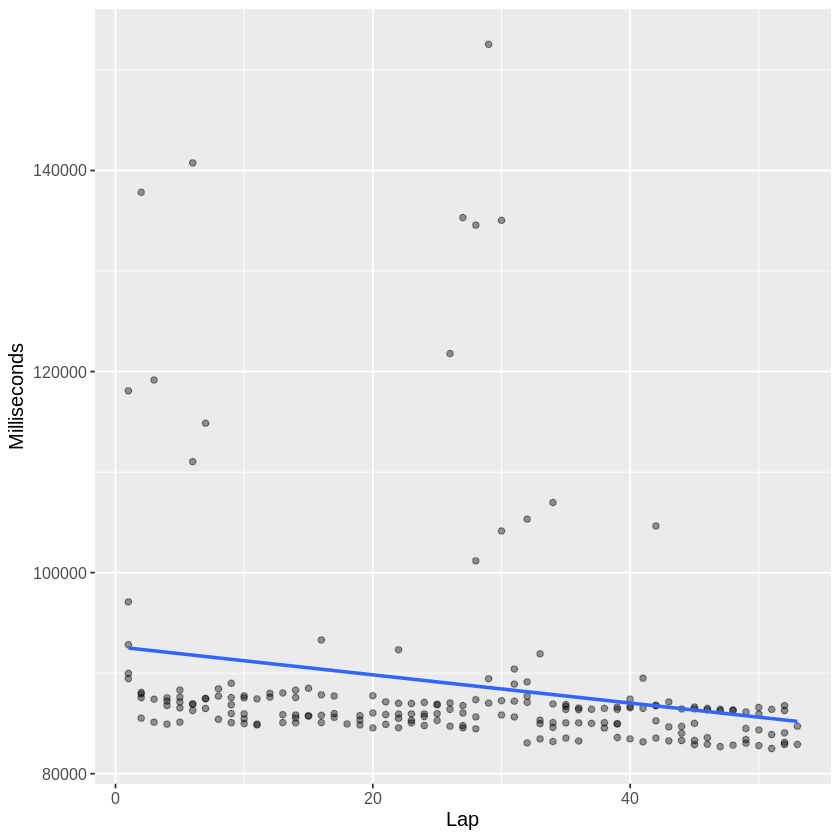

In [47]:
set.seed(2022)

#16. Monza, Italy

sv_monza <- vet_laps %>%
                filter(raceId %in% monza_race_ID) 

sv_monza_clean <- sv_monza %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        head(13)
sv_monza_clean
sv_monza_clean_ID <- sv_monza_clean %>%
                        pull(raceId)

sv_monza_races <- vet_laps %>%
                    filter(raceId %in% sv_monza_clean_ID)

formulaone_split <- initial_split(sv_monza_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 16

initiate_rmse() 

### GETS PREDICTION

get_monza_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
962,61
1003,61
1024,61


`geom_smooth()` using formula 'y ~ x'



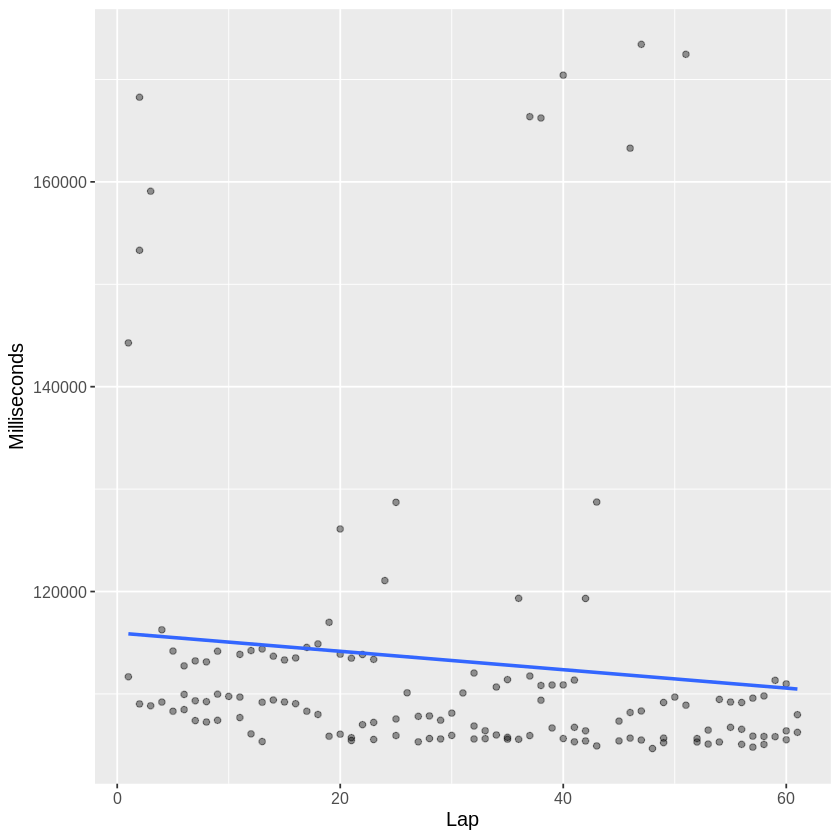

In [48]:
set.seed(2022)

#17. Singapore

sv_singapore <- vet_laps %>%
                filter(raceId %in% singapore_race_ID) 

sv_singapore_clean <- sv_singapore %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
sv_singapore_clean
sv_singapore_clean_ID <- sv_singapore_clean %>%
                        pull(raceId)

sv_singapore_races <- vet_laps %>%
                    filter(raceId %in% sv_singapore_clean_ID)

formulaone_split <- initial_split(sv_singapore_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 17

initiate_rmse() 

### GETS PREDICTION

get_singapore_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
964,53
1005,53
1026,52
984,4


`geom_smooth()` using formula 'y ~ x'



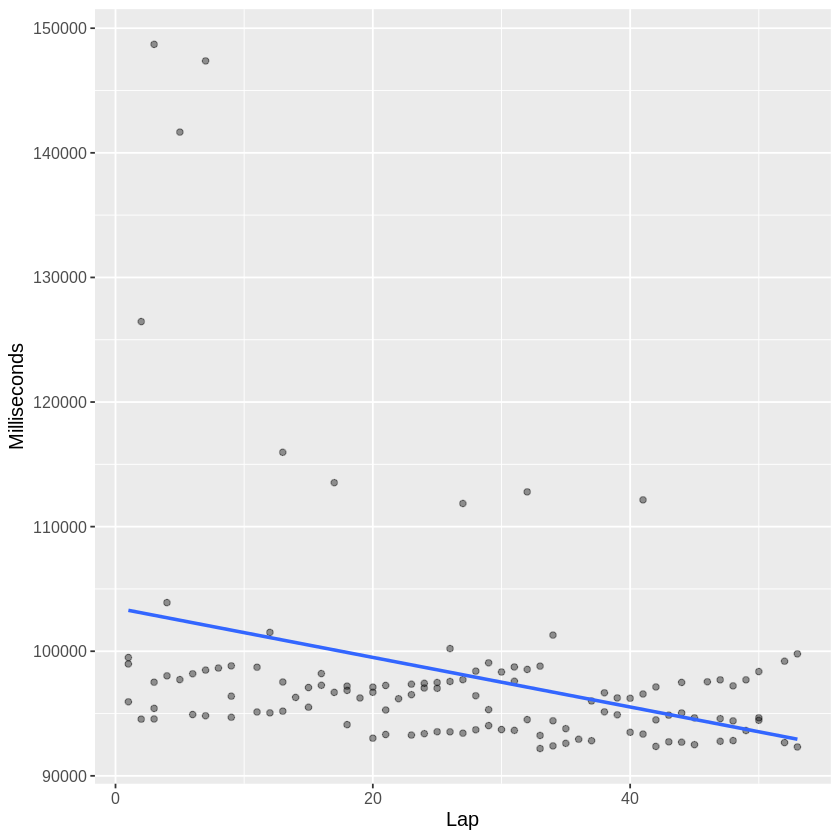

In [49]:
set.seed(2022)

#18. Japan

sv_japan <- vet_laps %>%
                filter(raceId %in% japan_race_ID) 

sv_japan_clean <- sv_japan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        head(9)
sv_japan_clean
sv_japan_clean_ID <- sv_japan_clean %>%
                        pull(raceId)

sv_japan_races <- vet_laps %>%
                    filter(raceId %in% sv_japan_clean_ID)

formulaone_split <- initial_split(sv_japan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 18

initiate_rmse() 

### GETS PREDICTION

get_japan_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
965,56
985,56
1006,56
1069,55
1028,7


`geom_smooth()` using formula 'y ~ x'



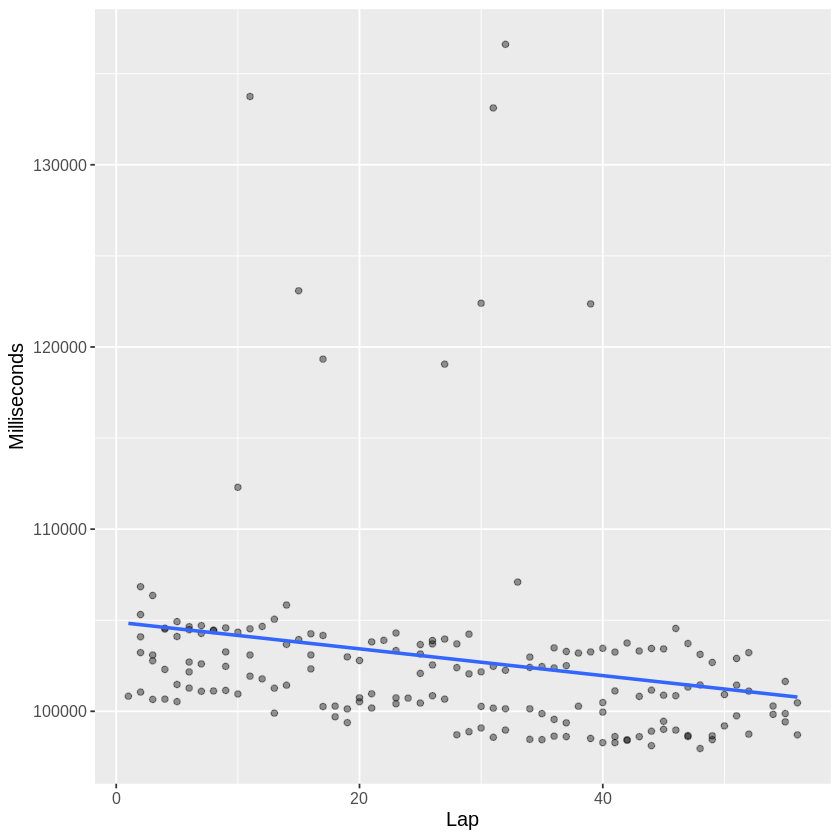

In [50]:
set.seed(2022)

#19. Austin

sv_austin <- vet_laps %>%
                filter(raceId %in% austin_race_ID) 

sv_austin_clean <- sv_austin %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        head(8)
sv_austin_clean
sv_austin_clean_ID <- sv_austin_clean %>%
                        pull(raceId)

sv_austin_races <- vet_laps %>%
                    filter(raceId %in% sv_austin_clean_ID)

formulaone_split <- initial_split(sv_austin_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 19

initiate_rmse() 

### GETS PREDICTION

get_austin_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
966,71
986,71
1007,71
1027,71
1070,70


`geom_smooth()` using formula 'y ~ x'



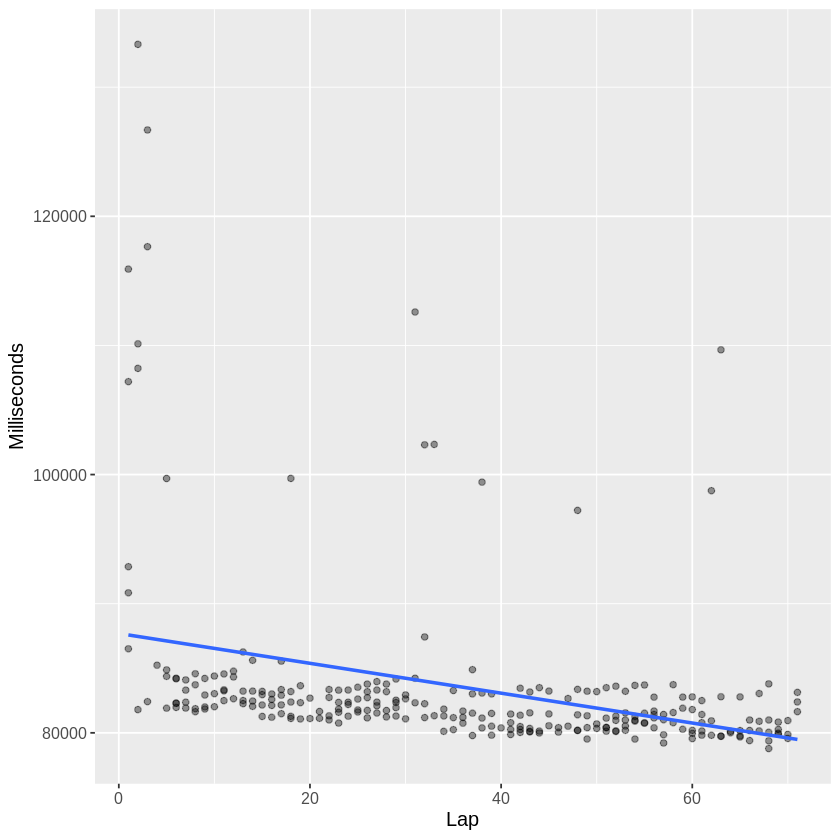

In [51]:
set.seed(2022)

#20. Mexico

sv_mexico <- vet_laps %>%
                filter(raceId %in% mexico_race_ID) 

sv_mexico_clean <- sv_mexico %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        head(5)
sv_mexico_clean
sv_mexico_clean_ID <- sv_mexico_clean %>%
                        pull(raceId)

sv_mexico_races <- vet_laps %>%
                    filter(raceId %in% sv_mexico_clean_ID)

formulaone_split <- initial_split(sv_mexico_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 20

initiate_rmse() 

### GETS PREDICTION

get_mexico_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
967,71
987,71
1008,71
1071,70
1029,65


`geom_smooth()` using formula 'y ~ x'



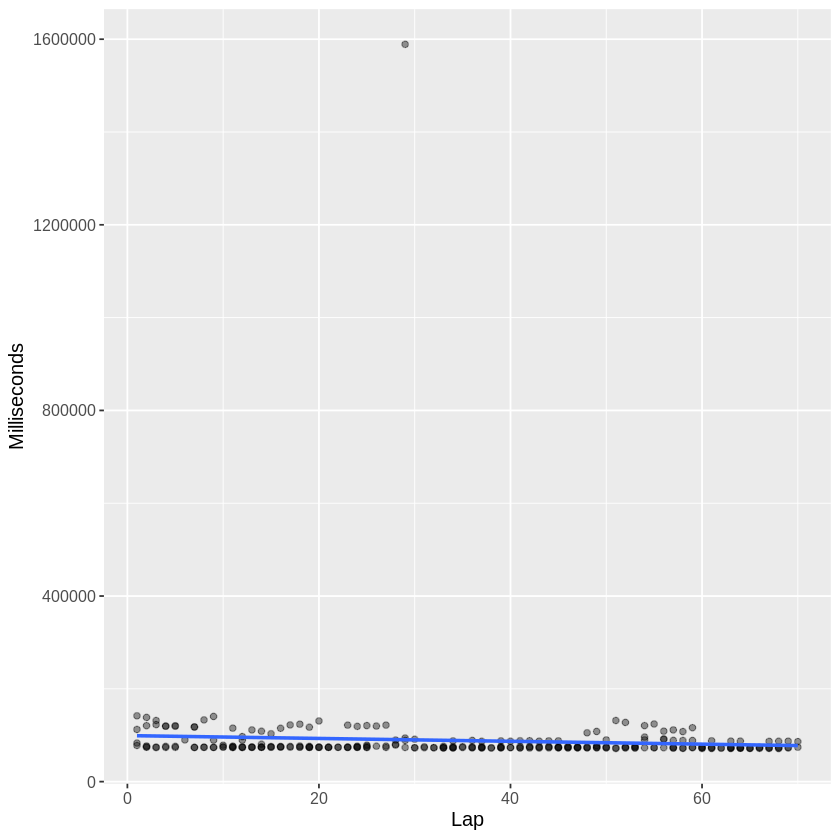

In [52]:
set.seed(2022)

#21. Brazil

sv_brazil <- vet_laps %>%
                filter(raceId %in% brazil_race_ID) 

sv_brazil_clean <- sv_brazil %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        head(12)
sv_brazil_clean
sv_brazil_clean_ID <- sv_brazil_clean %>%
                        pull(raceId)

sv_brazil_races <- vet_laps %>%
                    filter(raceId %in% sv_brazil_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(sv_brazil_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 21

initiate_rmse() 

### GETS PREDICTION

get_brazil_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
968,55
988,55
1009,55
1030,55
1047,54


`geom_smooth()` using formula 'y ~ x'



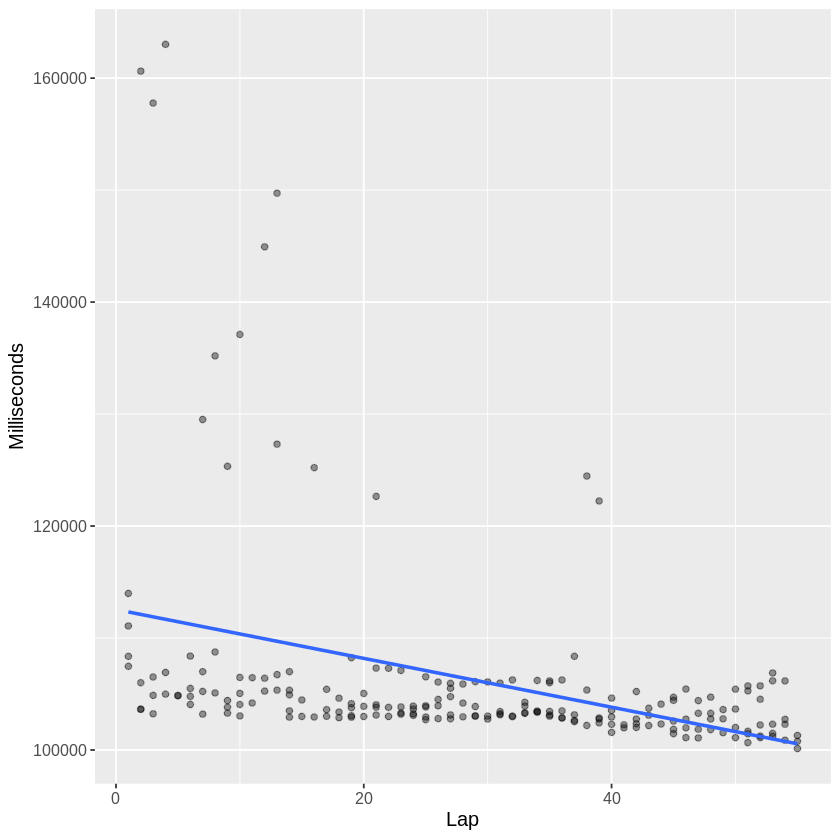

In [53]:
set.seed(2022)

#22. Abu Dhabi

sv_uae <- vet_laps %>%
                filter(raceId %in% uae_race_ID) 

sv_uae_clean <- sv_uae %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        head(12) %>%
                        filter(n != 58)
sv_uae_clean
sv_uae_clean_ID <- sv_uae_clean %>%
                        pull(raceId)

sv_uae_races <- vet_laps %>%
                    filter(raceId %in% sv_uae_clean_ID)

formulaone_split <- initial_split(sv_uae_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 22

initiate_rmse() 

### GETS PREDICTION

get_uae_prediction()

## Collection

In [54]:
rmse_col
racetime_col

sv_merge <- merge(rmse_col, racetime_col)

sv_merge

write_csv(sv_merge, "final_race_data/sv_race.csv")

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>
rmse,standard,12927.167,1
rmse,standard,10179.452,2
rmse,standard,16205.653,3
rmse,standard,19716.352,4
rmse,standard,8512.626,5
rmse,standard,12785.271,6
rmse,standard,8719.087,7
rmse,standard,173812.246,8
rmse,standard,7528.361,9


race_time_milliseconds,race_time_mins,race_time_hrs,Round
<dbl>,<dbl>,<dbl>,<dbl>
5711563,95.19271,1.586545,1
5622176,93.70293,1.561715,2
5269164,87.81940,1.463657,3
5620599,93.67665,1.561278,4
5786064,96.43440,1.607240,5
5760962,96.01604,1.600267,6
6377012,106.28353,1.771392,7
5906096,98.43493,1.640582,8
5451845,90.86409,1.514402,9


Round,.metric,.estimator,.estimate,race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,rmse,standard,12927.167,5711563,95.19271,1.586545
2,rmse,standard,10179.452,5622176,93.70293,1.561715
3,rmse,standard,16205.653,5269164,87.81940,1.463657
4,rmse,standard,19716.352,5620599,93.67665,1.561278
5,rmse,standard,8512.626,5786064,96.43440,1.607240
6,rmse,standard,12785.271,5760962,96.01604,1.600267
7,rmse,standard,8719.087,6377012,106.28353,1.771392
8,rmse,standard,173812.246,5906096,98.43493,1.640582
9,rmse,standard,7528.361,5451845,90.86409,1.514402
